<a href="https://colab.research.google.com/github/linesn/reddit_analysis/blob/main/vocabulary_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the vocabulary entropy of Reddit user groups

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import string
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
import nltk
from nltk import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
import pickle
import scipy.stats as st

In [ ]:
import os
if 'COLAB_GPU' in os.environ: # a hacky way of determining if you are in colab.
  print("Notebook is running in colab")
  from google.colab import drive
  drive.mount("/content/drive", force_remount=True)
  DATA_DIR = "./drive/My Drive/Data/"
  
else:
  # Get the system information from the OS
  PLATFORM_SYSTEM = platform.system()

  # Darwin is macOS
  if PLATFORM_SYSTEM == "Darwin":
      EXECUTABLE_PATH = Path("../dependencies/chromedriver")
  elif PLATFORM_SYSTEM == "Windows":
      EXECUTABLE_PATH = Path("../dependencies/chromedriver.exe")
  else:
      logging.critical("Chromedriver not found or Chromedriver is outdated...")
      exit()
  DATA_DIR = "../Data/raw/"

Notebook is running in colab
Mounted at /content/drive


In [ ]:
def vocabulary_quotient(token_array):
  '''Compute the vocabulary quotient given a token array.
  '''
  doc_length = len(token_array)
  emp_probs =  {i:count_nonzero(token_array==i)/doc_length for i in list(set(token_array))}
  entropy = -sum([p_i * log10(p_i) for p_i in emp_probs.values()])
  max_entropy = -log10(1/doc_length)
  return(entropy/max_entropy)

In [ ]:
def prep_text_list(text_list, min_length=100):
  '''Take a list of text strings and tokenize it, dropping entries with fewer 
  than min_length tokens'''
  new_list = []
  for item in text_list:
    tokenized_item = array(
        nltk.casual_tokenize(item.translate(str.maketrans(
            '', 
            '', 
            string.punctuation,
            )), 
        preserve_case=False,strip_handles=True)
        )
    if len(tokenized_item) >= min_length:
      new_list.append(tokenized_item[:min_length])
  return new_list

In [ ]:
# def vocabulary_quotient(token_array):
#   '''Compute the vocabulary quotient given a token array.
#   '''
#   doc_length = len(token_array)
#   emp_probs =  {i:count_nonzero(token_array==i)/doc_length for i in list(set(token_array))}
#   entropy = -sum([p_i * log10(p_i) for p_i in emp_probs.values()])
#   max_entropy = log10(doc_length)
#   return(100*entropy/max_entropy)

In [ ]:
!ls drive/MyDrive/Data/raw/Reddit/

e2lREDDIT_COMMENTS_2021-04-22T22-04-02-0400.csv
e2lREDDIT_POSTS_2021-04-22T22-01-51-0400.csv
gradREDDIT_COMMENTS_2021-04-22T20-29-36-0400.csv
gradREDDIT_POSTS_2021-04-22T20-21-07-0400.csv
highschoolREDDIT_COMMENTS_2021-04-22T18-37-36-0400.csv
highschoolREDDIT_POSTS_2021-04-22T18-31-58-0400.csv
politicsREDDIT_COMMENTS_2021-04-22T19-43-57-0400.csv
politicsREDDIT_POSTS_2021-04-22T18-56-51-0400.csv
REDDIT_COMMENTS_2021-02-03T17-02-00-0500.csv
REDDIT_COMMENTS_2021-04-22T15-39-47-0400.csv
REDDIT_COMMENTS_2021-04-22T15-50-58-0400.csv
REDDIT_COMMENTS_2021-04-22T17-44-07-0400.csv
REDDIT_COMMENTS_2021-04-22T18-02-22-0400.csv
REDDIT_COMMENTS_2021-04-22T18-18-25-0400.csv
REDDIT_COMMENTS_2021-04-22T18-30-04-0400.csv
REDDIT_COMMENTS_2021-04-22T22-00-51-0400.csv
REDDIT_POSTS_2021-02-03T16-56-30-0500.csv
REDDIT_POSTS_2021-04-22T15-33-15-0400.csv
REDDIT_POSTS_2021-04-22T15-50-02-0400.csv
REDDIT_POSTS_2021-04-22T17-41-18-0400.csv
REDDIT_POSTS_2021-04-22T18-00-03-0400.csv
REDDIT_POSTS_2021-04-22T18-12-08

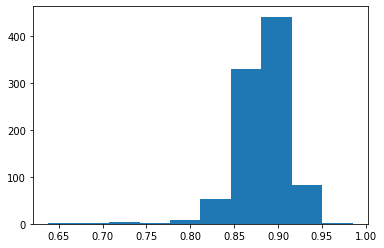

In [ ]:
hs_comment_df = pd.read_csv(DATA_DIR + "raw/Reddit/highschoolREDDIT_COMMENTS_2021-04-22T18-37-36-0400.csv")
hs_post_df = pd.read_csv(DATA_DIR + "raw/Reddit/highschoolREDDIT_POSTS_2021-04-22T18-31-58-0400.csv")
hs_text = hs_post_df.post_body.dropna().to_list() + hs_comment_df.comment_body.dropna().to_list()
hs_tokens = prep_text_list(hs_text)
hs_quotients = [vocabulary_quotient(item) for item in hs_tokens]
hist(hs_quotients);

In [ ]:
print(mean(hs_quotients), std(hs_quotients))

0.8829405540770686 0.02893951915766168


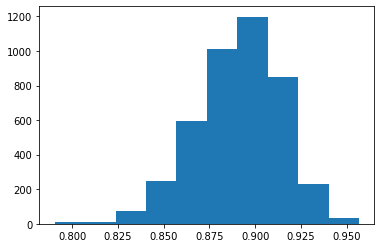

In [ ]:
grad_comment_df = pd.read_csv(DATA_DIR + "raw/Reddit/gradREDDIT_COMMENTS_2021-04-22T20-29-36-0400.csv")
grad_post_df = pd.read_csv(DATA_DIR + "raw/Reddit/gradREDDIT_POSTS_2021-04-22T20-21-07-0400.csv")
grad_text = grad_post_df.post_body.dropna().to_list() + grad_comment_df.comment_body.dropna().to_list()
grad_tokens = prep_text_list(grad_text)
grad_quotients = [vocabulary_quotient(item) for item in grad_tokens]
hist(grad_quotients);

In [ ]:
print(mean(grad_quotients), std(grad_quotients))

0.89088937614715 0.022973961067780324


0.8725284474022803 0.035781217632648785


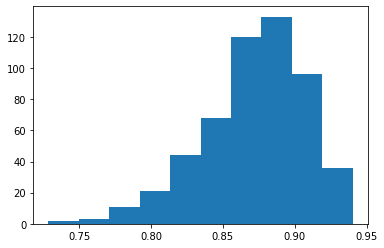

In [ ]:
e2l_comment_df = pd.read_csv(DATA_DIR + "raw/Reddit/e2lREDDIT_COMMENTS_2021-04-22T22-04-02-0400.csv")
e2l_post_df = pd.read_csv(DATA_DIR + "raw/Reddit/e2lREDDIT_POSTS_2021-04-22T22-01-51-0400.csv")
e2l_text = e2l_post_df.post_body.dropna().to_list() + e2l_comment_df.comment_body.dropna().to_list()
e2l_tokens = prep_text_list(e2l_text)
e2l_quotients = [vocabulary_quotient(item) for item in e2l_tokens]
hist(e2l_quotients);
print(mean(e2l_quotients), std(e2l_quotients))

In [ ]:
pol_comment_df = pd.read_csv(DATA_DIR + "raw/Reddit/politicsREDDIT_COMMENTS_2021-04-22T19-43-57-0400.csv")
pol_post_df = pd.read_csv(DATA_DIR + "raw/Reddit/politicsREDDIT_POSTS_2021-04-22T18-56-51-0400.csv")
pol_text = pol_post_df.post_body.dropna().to_list() + pol_comment_df.comment_body.dropna().to_list()

In [ ]:
political_subreddits = list(set(concatenate((pol_comment_df["subreddit"].unique(),pol_post_df["subreddit"].unique()))))
political_subreddits.sort()
print(political_subreddits)

['Freethought', 'PoliticalDiscussion', 'changemyview', 'geopolitics', 'government', 'news', 'politics', 'politics2', 'uspolitics', 'worldnews']


In [ ]:
political_subreddit_post_texts = []
political_subreddit_comment_texts = []
for sr in political_subreddits:
  post_update = []
  comment_update = []
  if sr in pol_post_df.subreddit.values:
    post_update = pol_post_df[pol_post_df["subreddit"]==sr].post_body.dropna().to_list()
  if sr in pol_comment_df.subreddit.values:
    comment_update = pol_comment_df[pol_comment_df["subreddit"]==sr].comment_body.dropna().to_list()  
  political_subreddit_post_texts.append(post_update)
  political_subreddit_comment_texts.append(comment_update)

In [ ]:
print([len(i) for i in political_subreddit_post_texts])
print([len(i) for i in political_subreddit_comment_texts])

[55, 965, 985, 306, 130, 0, 4, 165, 31, 0]
[1432, 25795, 18432, 7012, 580, 3824, 19540, 250, 1990, 2225]


In [ ]:
pol_sr_post_tokens = [prep_text_list(txt) for txt in tqdm(political_subreddit_post_texts)]
pol_sr_comment_tokens = [prep_text_list(txt) for txt in tqdm(political_subreddit_comment_texts)]

In [ ]:
pol_sr_post_quotients = [[vocabulary_quotient(item) for item in tkns] for tkns in tqdm(pol_sr_post_tokens)]
pol_sr_comment_quotients = [[vocabulary_quotient(item) for item in tkns] for tkns in tqdm(pol_sr_comment_tokens)]

In [ ]:
pol_sr_quotients = [pol_sr_post_quotients[i]+pol_sr_comment_quotients[i] for i in range(len(political_subreddits))]

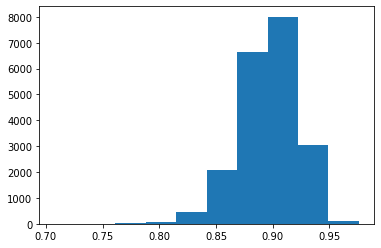

In [ ]:
pol_tokens = prep_text_list(pol_text)
pol_quotients = [vocabulary_quotient(item) for item in pol_tokens]
hist(pol_quotients);

In [ ]:
post_quotients = [e2l_quotients, hs_quotients, grad_quotients, pol_quotients] + pol_sr_post_quotients
post_labels = ["English as a second language", "high school", "graduate school", "all_politics"] + [i+"_posts" for i in political_subreddits]

In [ ]:
comment_quotients = [e2l_quotients, hs_quotients, grad_quotients, pol_quotients] + pol_sr_comment_quotients
comment_labels = ["English as a second language", "high school", "graduate school", "all_politics"] + [i+"_comments" for i in political_subreddits]

In [ ]:
quotients = [e2l_quotients, hs_quotients, grad_quotients, pol_quotients] + pol_sr_quotients
labels = ["English as a second language", "high school", "graduate school", "all_politics"] + political_subreddits

In [ ]:
with open(DATA_DIR+"quotients_labels", "wb") as outfile:
  pickle.dump([quotients, labels, post_quotients, post_labels, comment_quotients,comment_labels], outfile)

In [ ]:
with open(DATA_DIR+"quotients_labels", "rb") as infile:
  [quotients, labels, post_quotients, post_labels, comment_quotients,comment_labels] = pickle.load(infile)

In [ ]:
for i in range(len(quotients)):
  print(labels[i], len(quotients[i]), len(post_quotients[i]), len(comment_quotients[i])) 

English as a second language 534 534 534
high school 923 923 923
graduate school 4260 4260 4260
all_politics 20411 20411 20411
Freethought 160 34 126
PoliticalDiscussion 7790 567 7223
changemyview 7994 960 7034
geopolitics 2011 157 1854
government 100 39 61
news 209 0 209
politics 1669 0 1669
politics2 83 52 31
uspolitics 187 10 177
worldnews 208 0 208


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


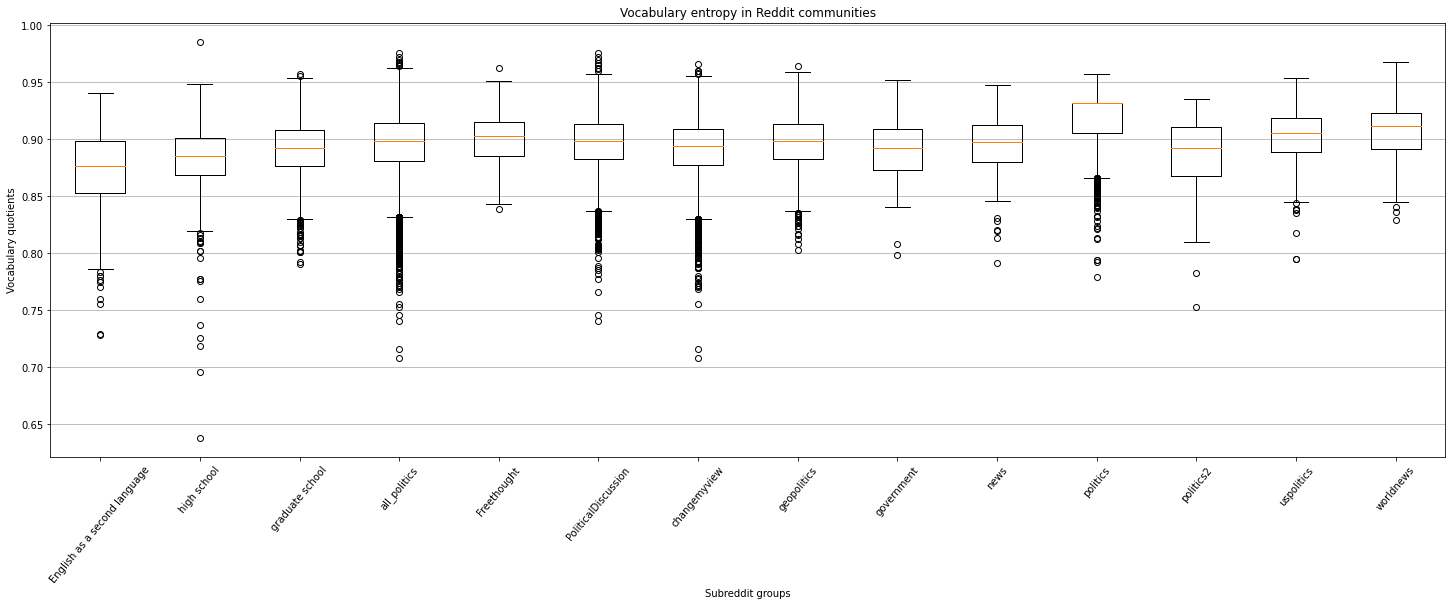

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# plot box plot
axs.boxplot(quotients)
axs.set_title('Vocabulary entropy in Reddit communities')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(quotients))])
axs.set_xlabel('Subreddit groups')
axs.set_ylabel('Vocabulary quotients')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(quotients))],
         xticklabels=labels,)
axs.set_xticklabels(labels, rotation = 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


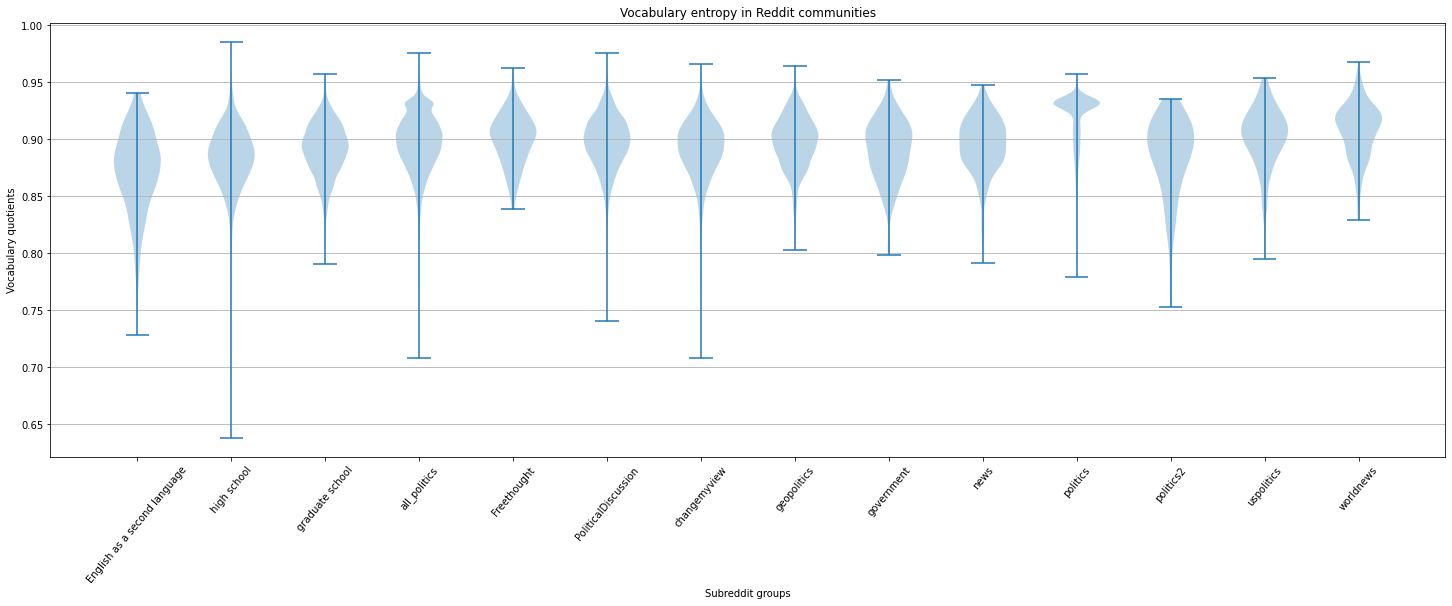

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# plot box plot
axs.violinplot(quotients)
axs.set_title('Vocabulary entropy in Reddit communities')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(quotients))])
axs.set_xlabel('Subreddit groups')
axs.set_ylabel('Vocabulary quotients')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(quotients))],
         xticklabels=labels,)
axs.set_xticklabels(labels, rotation = 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


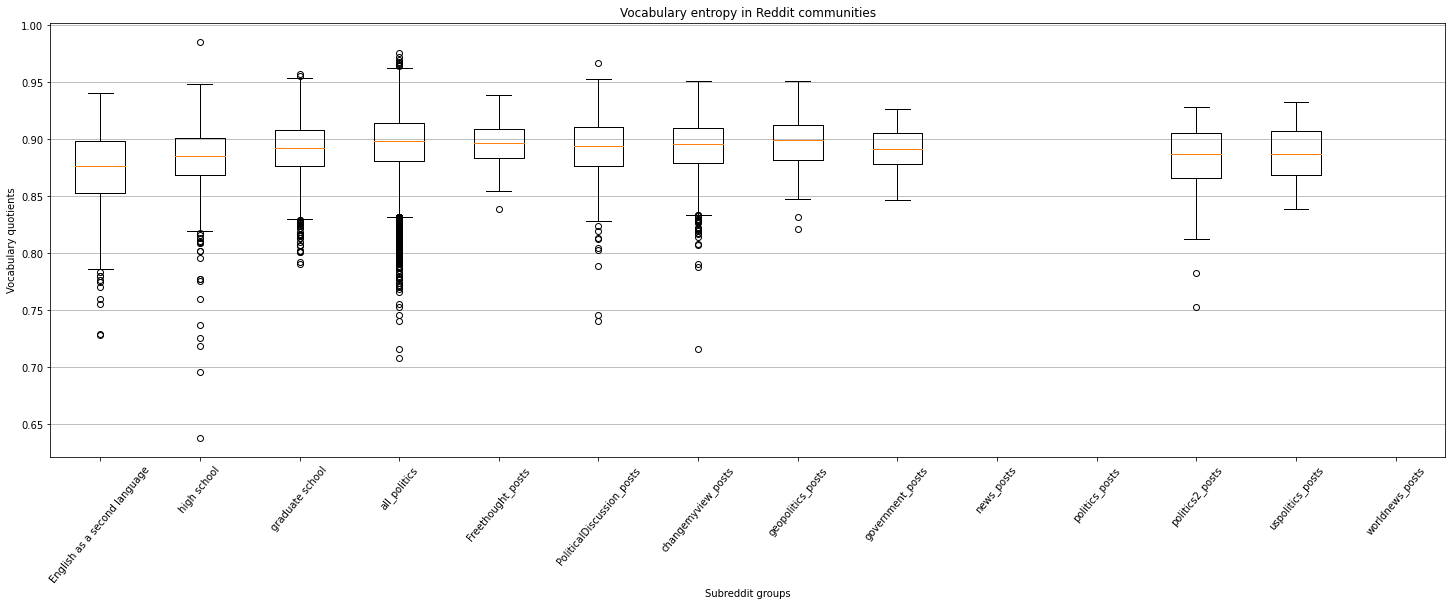

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# plot box plot
axs.boxplot(post_quotients)
axs.set_title('Vocabulary entropy in Reddit communities')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(post_quotients))])
axs.set_xlabel('Subreddit groups')
axs.set_ylabel('Vocabulary quotients')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(post_quotients))],
         xticklabels=post_labels,)
axs.set_xticklabels(post_labels, rotation = 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


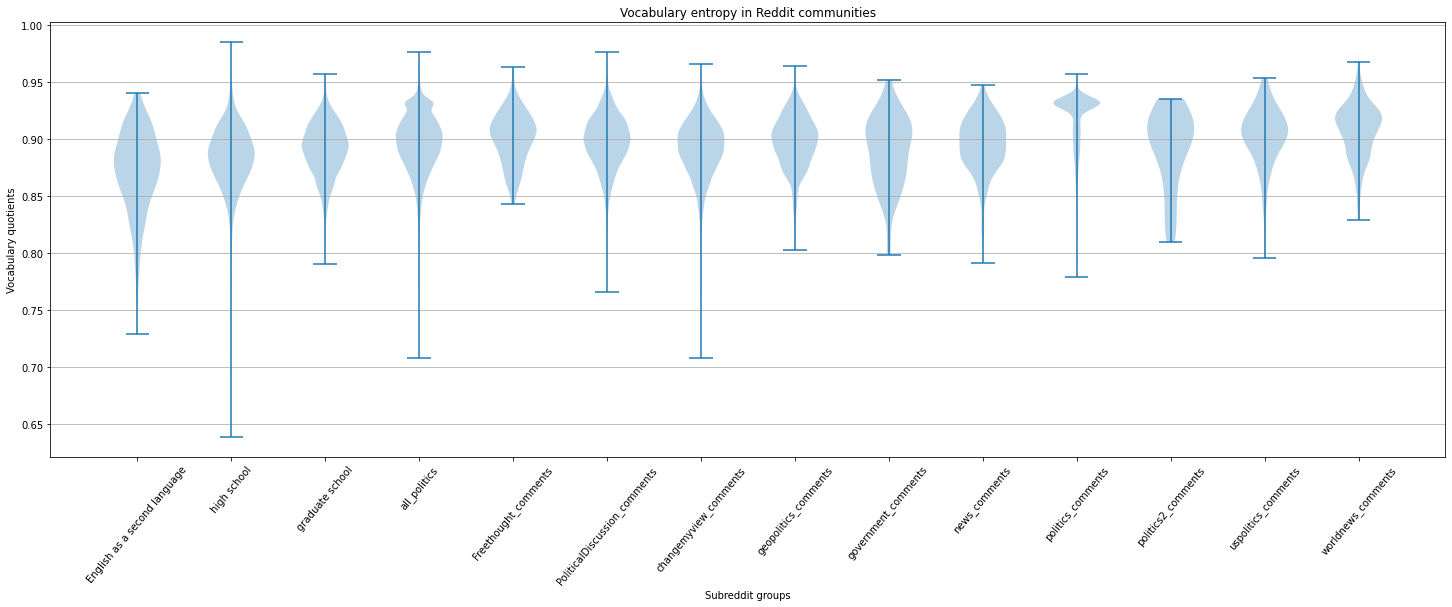

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# plot box plot
axs.violinplot(comment_quotients)
axs.set_title('Vocabulary entropy in Reddit communities')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(comment_quotients))])
axs.set_xlabel('Subreddit groups')
axs.set_ylabel('Vocabulary quotients')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(comment_quotients))],
         xticklabels=comment_labels,)
axs.set_xticklabels(comment_labels, rotation = 50)
plt.show()

In [ ]:
comments_and_posts_quotients = [val for pair in zip(post_quotients[4:], comment_quotients[4:]) for val in pair]
comments_and_posts_labels = [val for pair in zip(post_labels[4:], comment_labels[4:]) for val in pair]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


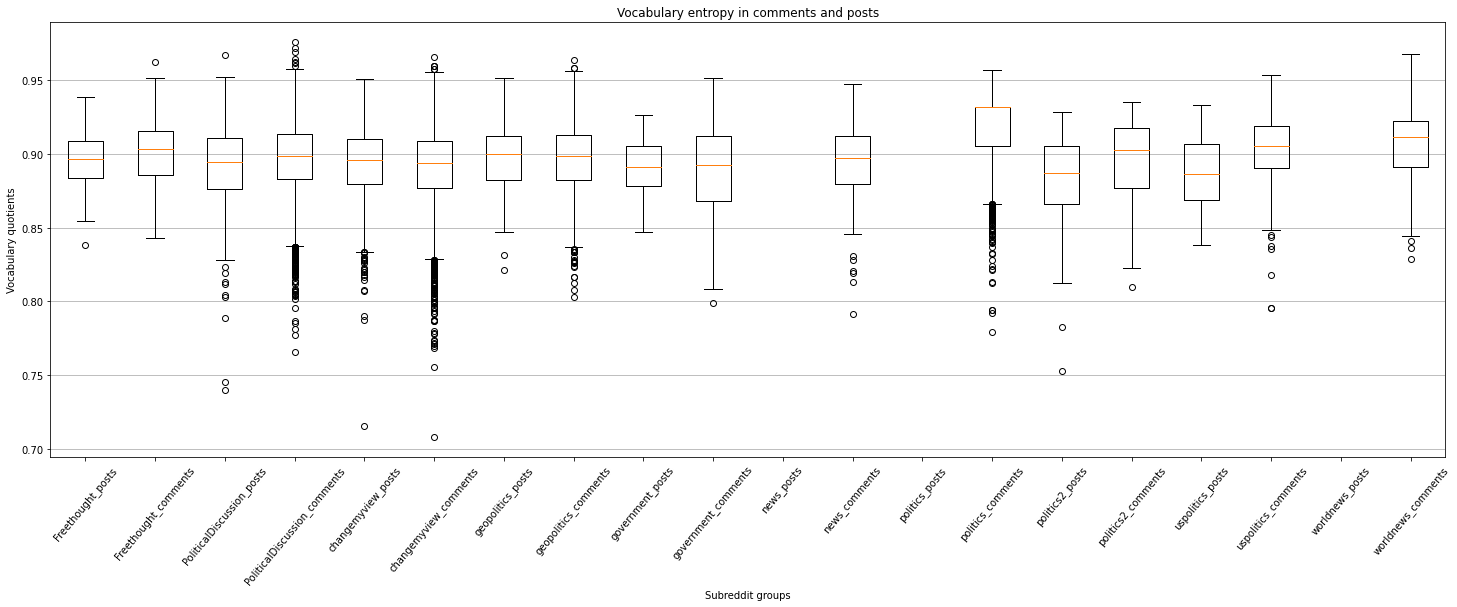

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
# plot box plot
axs.boxplot(comments_and_posts_quotients)
axs.set_title('Vocabulary entropy in comments and posts')

# adding horizontal grid lines
axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(len(comments_and_posts_quotients))])
axs.set_xlabel('Subreddit groups')
axs.set_ylabel('Vocabulary quotients')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(comments_and_posts_quotients))],
         xticklabels=comments_and_posts_labels,)
axs.set_xticklabels(comments_and_posts_labels, rotation = 50)
plt.show()

## Statistics

In each sample we know   

$$\bar{x}=\hat{\mu}\sim N(\mu,\frac{\sigma_x}{\sqrt{n}})$$

and we can approximate $\sigma_x$ with $S_x$. This gives us the $(1-\alpha)$ confidence interval for $\mu$ 

$$\bar{x}\pm z_{\alpha/2}\frac{S_x}{\sqrt{n}}$$

In [16]:
alpha = 0.05
x_bar = mean(quotients[0])
S_x = std(quotients[0])
z = st.norm(0,1).ppf(1-alpha/2)
n = len(quotients[0])
st.norm(x_bar,S_x/sqrt(n)).interval(0.95)

0.8694936299142692 0.8755632648902915


In [18]:
x_bars = [mean(i) for i in quotients]
se = [std(quotients[i])/sqrt(len(quotients[i])) for i in range(len(quotients))]
conf_intervals = [st.norm(x_bars[i],se[i]).interval(0.95) for i in range(len(quotients))]
highs = [i[1] for i in conf_intervals]
lows = [i[0] for i in conf_intervals]

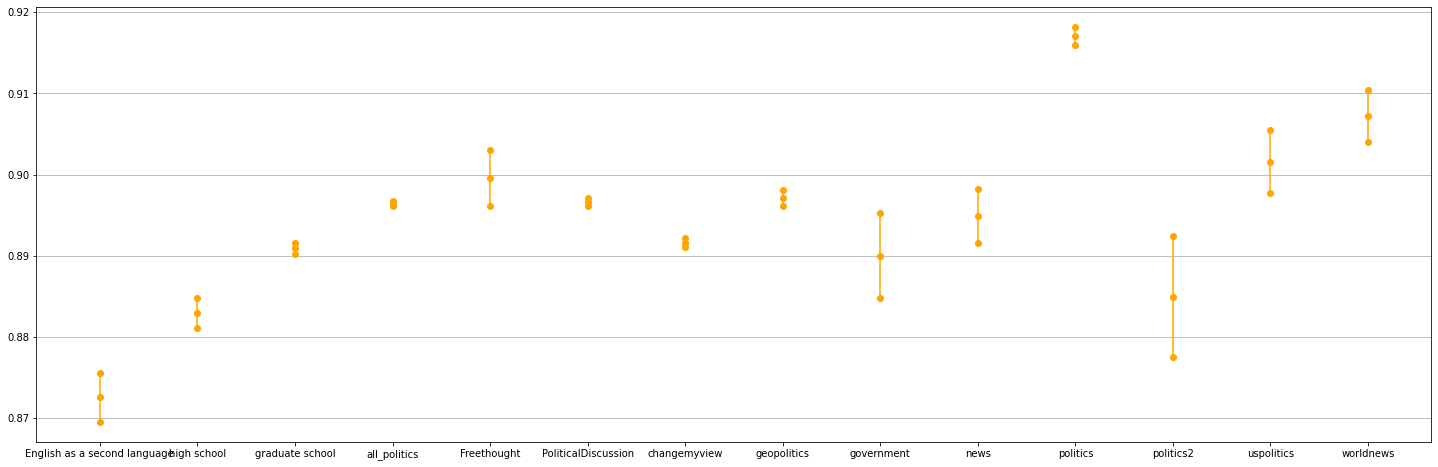

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))
axs.yaxis.grid(True)
for lower,x_bar,upper,x in zip(lows,x_bars,highs,range(len(x_bars))):
    plot((x,x,x),(lower,x_bar,upper),'ro-',color='orange');
xticks(range(len(x_bars)), labels);

In [ ]:
print(mean(pol_quotients),std(pol_quotients))

0.8964356085907508 0.02525557843883258


In [21]:
text = nltk.corpus.gutenberg.raw('milton-paradise.txt')
text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation

In [44]:
text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation

In [45]:
tokens = array(nltk.casual_tokenize(text, preserve_case=False,strip_handles=True))

In [46]:
vocabulary_quotient(tokens)

0.6304034073858895

In [47]:
def test_a_text(tokens_array, num_tests, test_length):
  text_length = len(tokens_array)
  starts = random.randint(low=0,high=text_length-test_length, size= num_tests)
  txt_quotients = []
  for i in tqdm(range(num_tests)):
    test_sample = tokens_array[starts[i]:starts[i] + test_length]
    txt_quotients.append(vocabulary_quotient(test_sample))
  #hist(quotients);
  return(np.mean(txt_quotients))

In [48]:
test_lengths = [10,100,200,500,1000]
quotient_means = []
for test_length in test_lengths:
  quotient_means.append(test_a_text(tokens, 100, test_length))

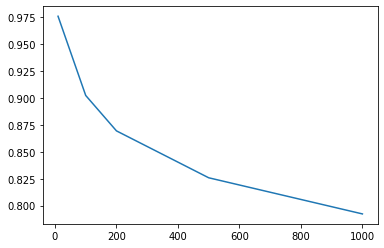

In [49]:
plot(test_lengths, quotient_means);

In [55]:
test_a_text(tokens, 100, 100)

0.9035558636270413

In [42]:
test_a_text(tokens, 100, 200)

0.8877208506353869

0.8702341720401605

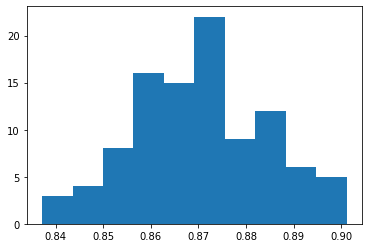

In [ ]:
test_a_text(tokens, 100, 300)

In [ ]:
r = array([1,2,1,2])
count_nonzero(r==1)

2

In [ ]:
test = randint(low=0, high=500, size=1000)
test.size

1000

In [ ]:
-log10(1/len(test))

3.0

In [ ]:
len(test)

1000

In [ ]:

nltk.casual_tokenize("Here is some crazy text, yo", preserve_case=False,strip_handles=True)

['here', 'is', 'some', 'crazy', 'text', ',', 'yo']

In [ ]:
s = "Here is some crazy text, yo!" 
s.translate(str.maketrans('', '', string.punctuation))

'Here is some crazy text yo'